# **Diabetes EDA and ML Prediction**

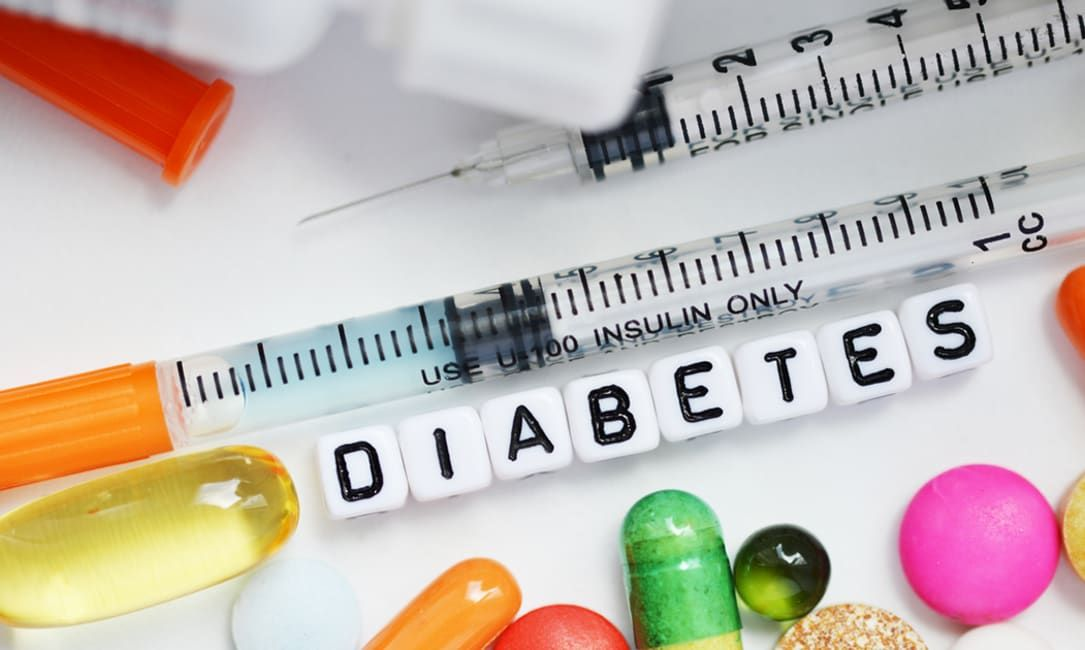

# **Business Problem**

It is desired to develop a machine learning model that can predict whether people have diabetes when their features are specified. Before developing the model, you are expected to perform the necessary data analysis and feature engineering steps.

# **Dataset Story**

The dataset is part of a larger dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the US. In the US Pima Indian women aged 21 years and older living in Phoenix, the 5th largest city in the State of Arizona are the data used for diabetes research.

The target variable is specified as **"outcome"**, where 1 indicates a positive diabetes test result and 0 indicates a negative result.

* **Pregnancies:** Number of pregnancies

* **Glucose:** 2-hour plasma glucose concentration in oral glucose tolerance test

* **Blood Pressure:** Blood Pressure (small blood pressure) (mm Hg)

* **SkinThickness:** Skin Thickness

* **Insulin:** 2-hour serum insulin (mu U/ml)

* **DiabetesPedigreeFunction:** Function (2-hour plasma glucose concentration in oral glucose tolerance test)

* **BMI:** Body mass index

* **Age:** Age (years)

* **Outcome:** Have the disease (1) or not (0)

# **Road Map**

* 1. Import Required Libraries

* 2. Adjusting Row Column Settings

* 3. Loading the data Set

* 4. Exploratory Data Analysis

* 5. Capturing / Detecting Numeric and Categorical Variables

* 6. Analysis of Categorical Variables

* 7. Analysis of Numerical Variables

* 8. Analysis of Numeric Variables by Target

* 9. Analysis of Categorical Variables by Target

* 10. Correlation Analysis

* 11. Distribution of the Dependent Variable
      
* 12. Examining the Logarithm of the Dependent Variable

* 13. Feature Engineering

* 14. Missing Value Analysis

* 15. Outlier Analysis

* 16. Base Model

* 17. Comparison of Metrics for Different Models Before Feature Engineering

* 18. Feature Importance For Base Model

* 19. Feature Extraction

* 20. ENCODING

* 21. Standardization Process

* 22. Creating Model

* 23. Comparison of Metrics for Different Models After Feature Engineering

* 24. Feature Importance

* 25. Metric Improvement Comparison After Feature Engineering

* 26. Hyperparameter Optimization
 
* 27. Final Model

# **1. Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.simplefilter(action="ignore")

# **2. Adjusting Row Column Settings**

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **3. Loading the Dataset**

In [3]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')

# **4. Exploratory Data Analysis**

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    numeric_df = df.select_dtypes(include='number')
    # quantile() işlemi
    quantiles = numeric_df.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T
    print(quantiles)

In [5]:
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                    

In [6]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0              6      148             72             35        0 33.600   
1              1       85             66             29        0 26.600   
2              8      183             64              0        0 23.300   
3              1       89             66             23       94 28.100   
4              0      137             40             35      168 43.100   
..           ...      ...            ...            ...      ...    ...   
763           10      101             76             48      180 32.900   
764            2      122             70             27        0 36.800   
765            5      121             72             23      112 26.200   
766            1      126             60              0        0 30.100   
767            1       93             70             31        0 30.400   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# **5. Capturing / Detecting Numeric and Categorical Variables**

In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [8]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [9]:
cat_cols

['Outcome']

In [10]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [11]:
cat_but_car

[]

In [12]:
num_but_cat

['Outcome']

# **6. Analysis of Categorical Variables**

In [13]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe, palette="Set2")
        plt.show(block=True)

         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896
##########################################


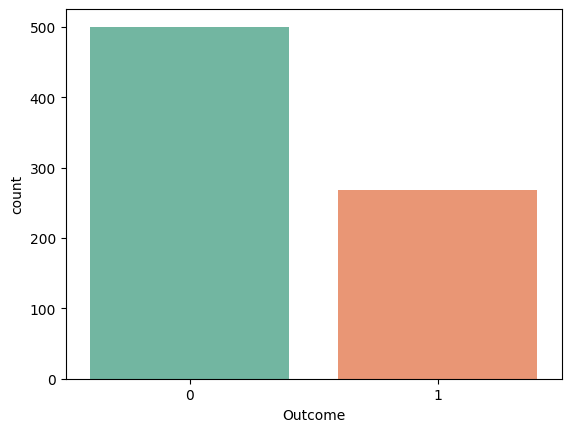

In [14]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

# **7. Analysis of Numerical Variables**

In [15]:
def num_summary(dataframe, col_name, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        sns.histplot(data=dataframe, x=col_name, bins=20, kde=True, color="blue")
        plt.show(block=True)

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


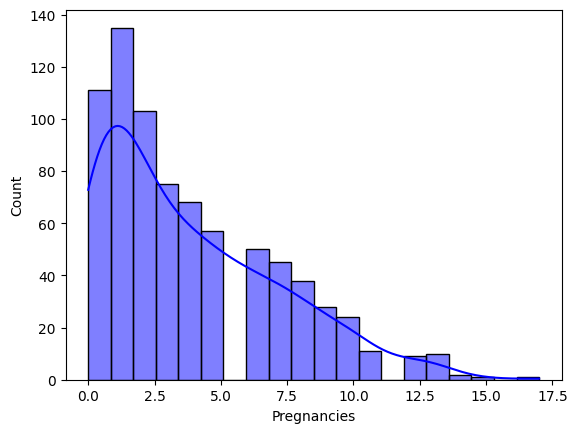

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


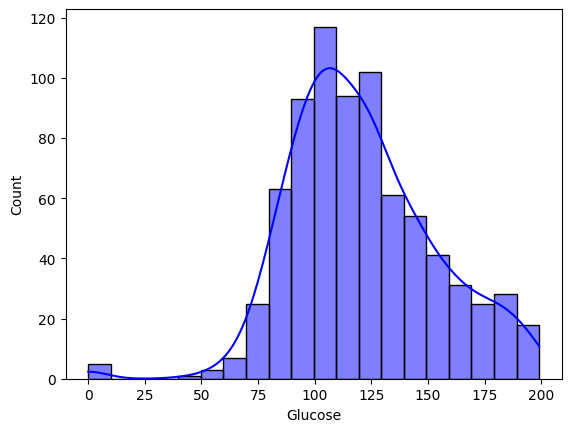

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


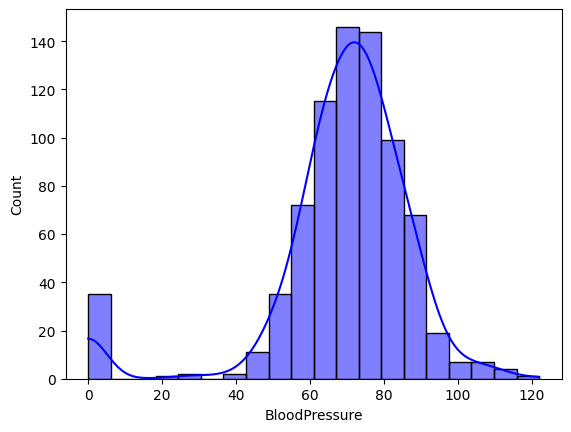

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


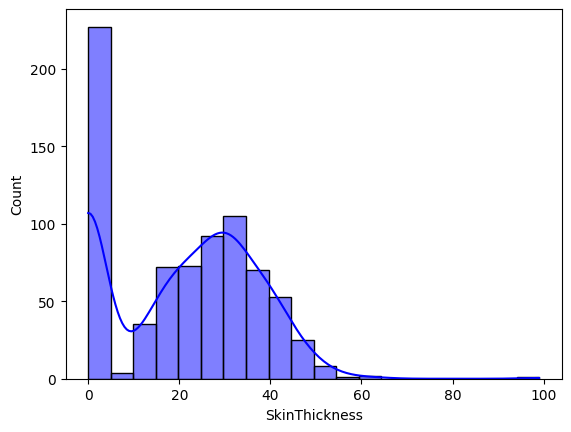

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


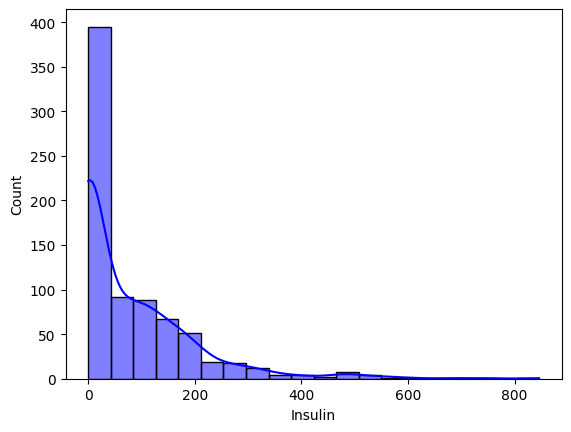

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


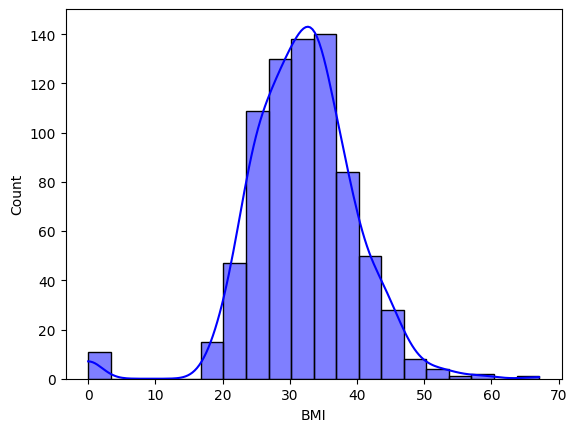

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


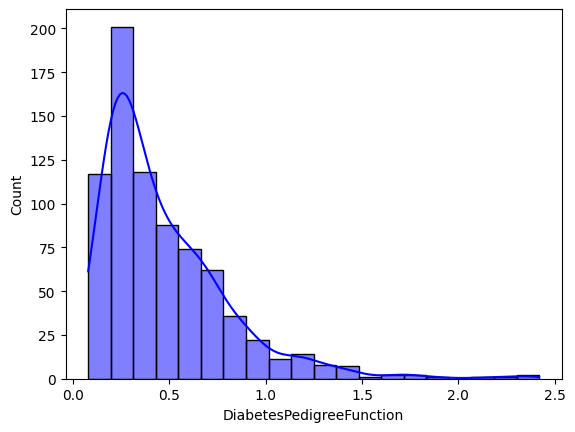

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


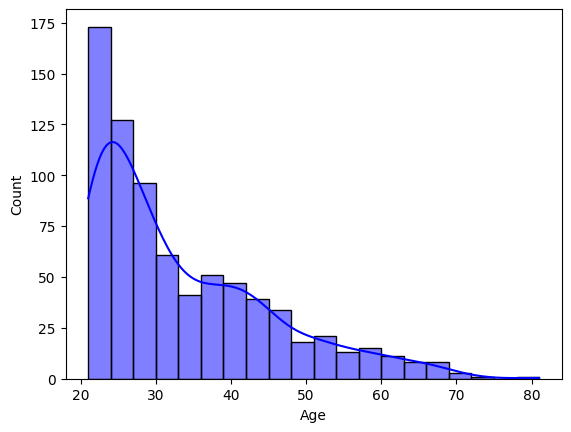

In [16]:
for col in num_cols:
    num_summary(df, col, plot=True)

# **8. Analysis of Categorical Variables by Target**

In [17]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe, palette="Set2")
        plt.show(block=True)

         TARGET_MEAN
Outcome             
0              0.000
1              1.000




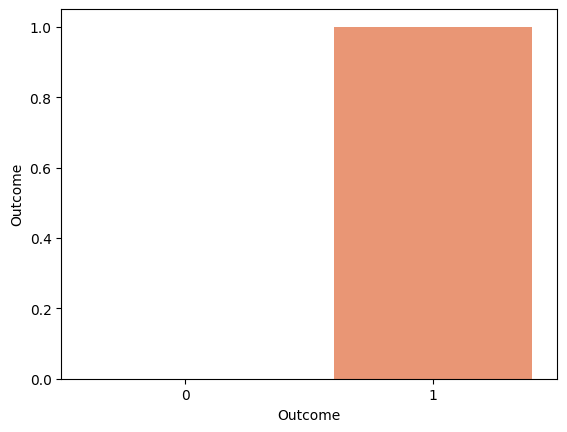

In [18]:
for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col, plot=True)

# **9. Analysis of Numeric Variables by Target**

In [19]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

         Pregnancies_mean
Outcome                  
0                   3.298
1                   4.866




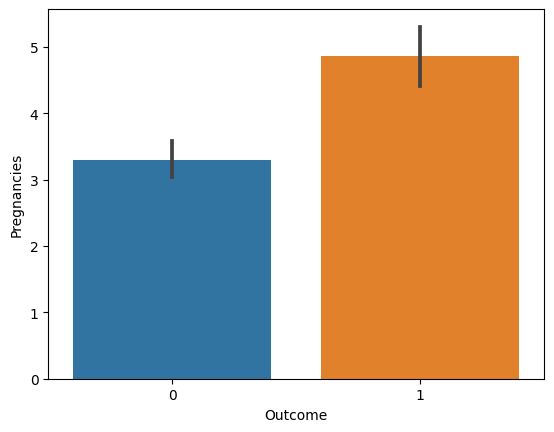

         Glucose_mean
Outcome              
0             109.980
1             141.257




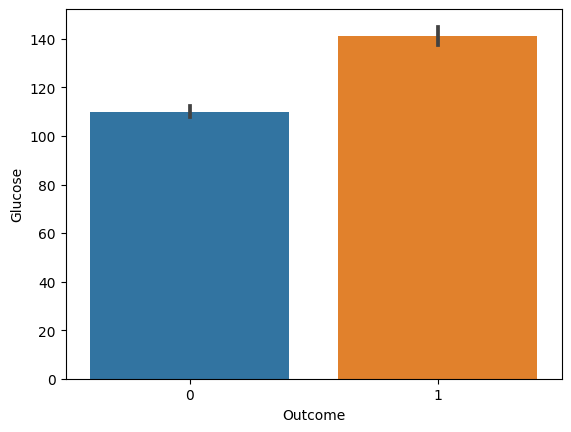

         BloodPressure_mean
Outcome                    
0                    68.184
1                    70.825




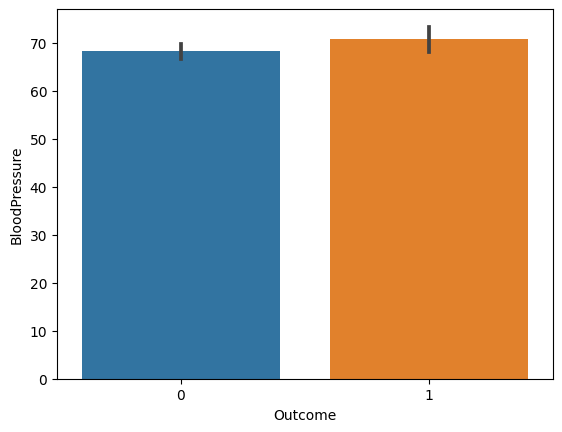

         SkinThickness_mean
Outcome                    
0                    19.664
1                    22.164




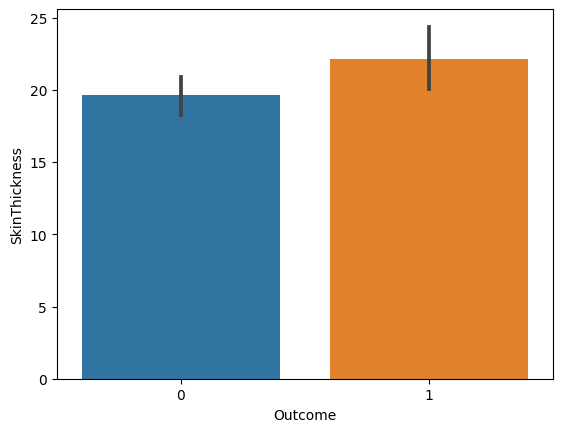

         Insulin_mean
Outcome              
0              68.792
1             100.336




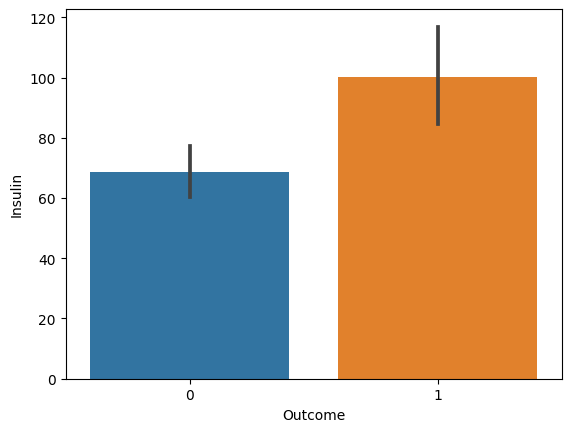

         BMI_mean
Outcome          
0          30.304
1          35.143




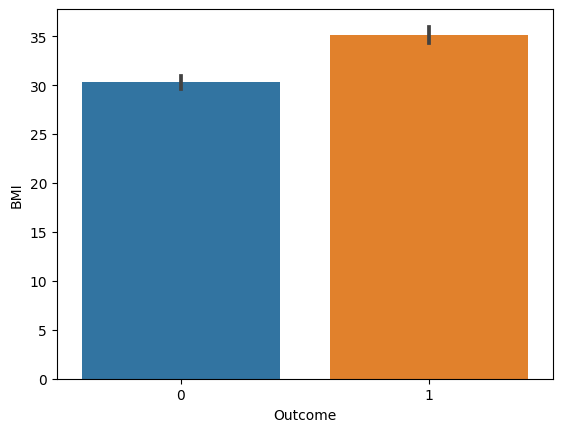

         DiabetesPedigreeFunction_mean
Outcome                               
0                                0.430
1                                0.550




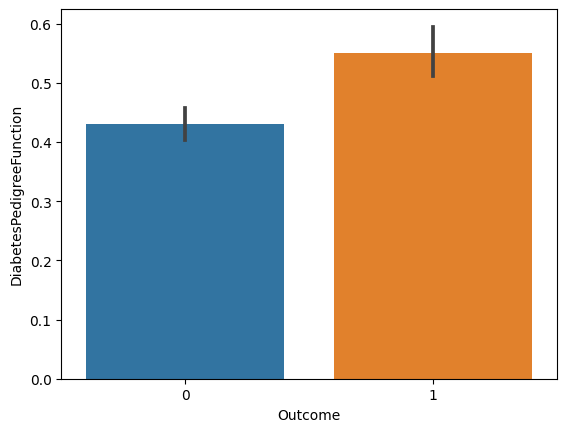

         Age_mean
Outcome          
0          31.190
1          37.067




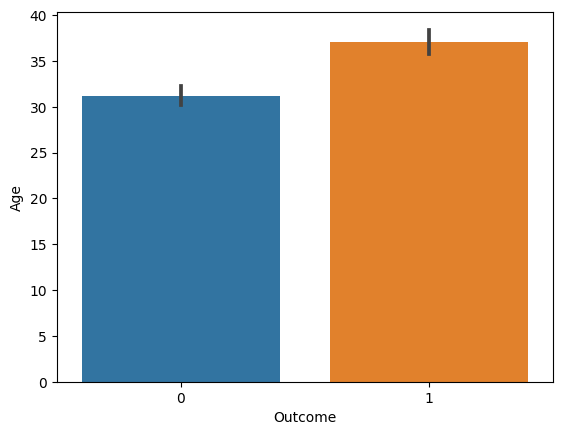

In [20]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col, plot=True)

# **10. Correlation Analysis**

In [21]:
corr = df[num_cols].corr()

In [22]:
corr

Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                     1.000    0.129          0.141         -0.082   
Glucose                         0.129    1.000          0.153          0.057   
BloodPressure                   0.141    0.153          1.000          0.207   
SkinThickness                  -0.082    0.057          0.207          1.000   
Insulin                        -0.074    0.331          0.089          0.437   
BMI                             0.018    0.221          0.282          0.393   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184   
Age                             0.544    0.264          0.240         -0.114   

                          Insulin   BMI  DiabetesPedigreeFunction    Age  
Pregnancies                -0.074 0.018                    -0.034  0.544  
Glucose                     0.331 0.221                     0.137  0.264  
BloodPressure               0.089 0.282                     0.041  0.240  
SkinThickness               0.437 0.393                     0.184 -0.114  
Insulin                     1.000 0.198                     0.185 -0.042  
BMI                         0.198 1.000                     0.141  0.036  
DiabetesPedigreeFunction    0.185 0.141                     1.000  0.034  
Age                        -0.042 0.036                     0.034  1.000

In [23]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    # Only numerical columns
    numeric_df = dataframe.select_dtypes(include=[np.number])

    # Correlation matrix
    corr = numeric_df.corr()
    cor_matrix = corr.abs()

    # Select upper triangular matrix (to remove unnecessary repetitions)
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

    # Let's select the column pairs whose correlation is higher than the threshold
    high_corrs = [(col, row)
                  for col in cor_matrix.columns
                  for row in cor_matrix.index
                  if not pd.isna(upper_triangle_matrix.loc[row, col]) and abs(
            upper_triangle_matrix.loc[row, col]) > corr_th]

    if plot:
        # Heat map
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu")
        plt.title("Correlation Heat Map")
        plt.show()

    return high_corrs

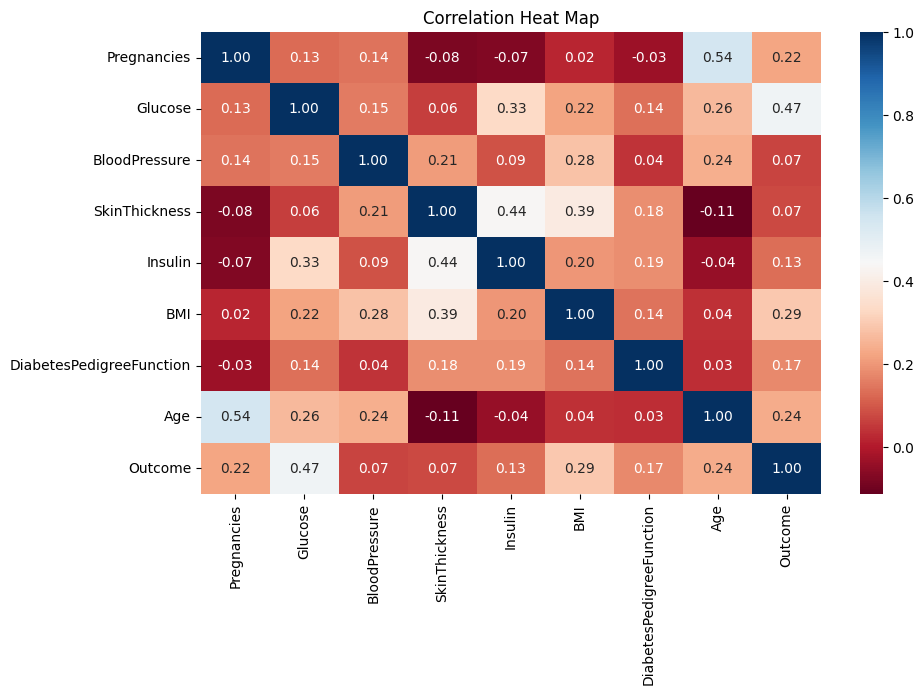

[]

In [24]:
high_correlated_cols(df, plot=True)

# **11. Distribution of the Dependent Variable**

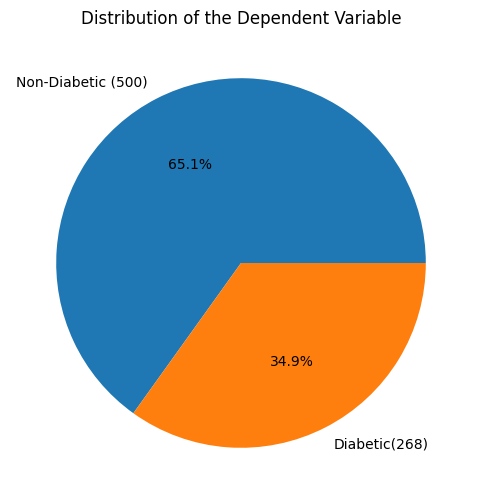

In [25]:
# Calculate the counts of each outcome
outcome_counts = df['Outcome'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'Non-Diabetic ({outcome_counts[0]})',
          f'Diabetic({outcome_counts[1]})']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of the Dependent Variable')
plt.show()

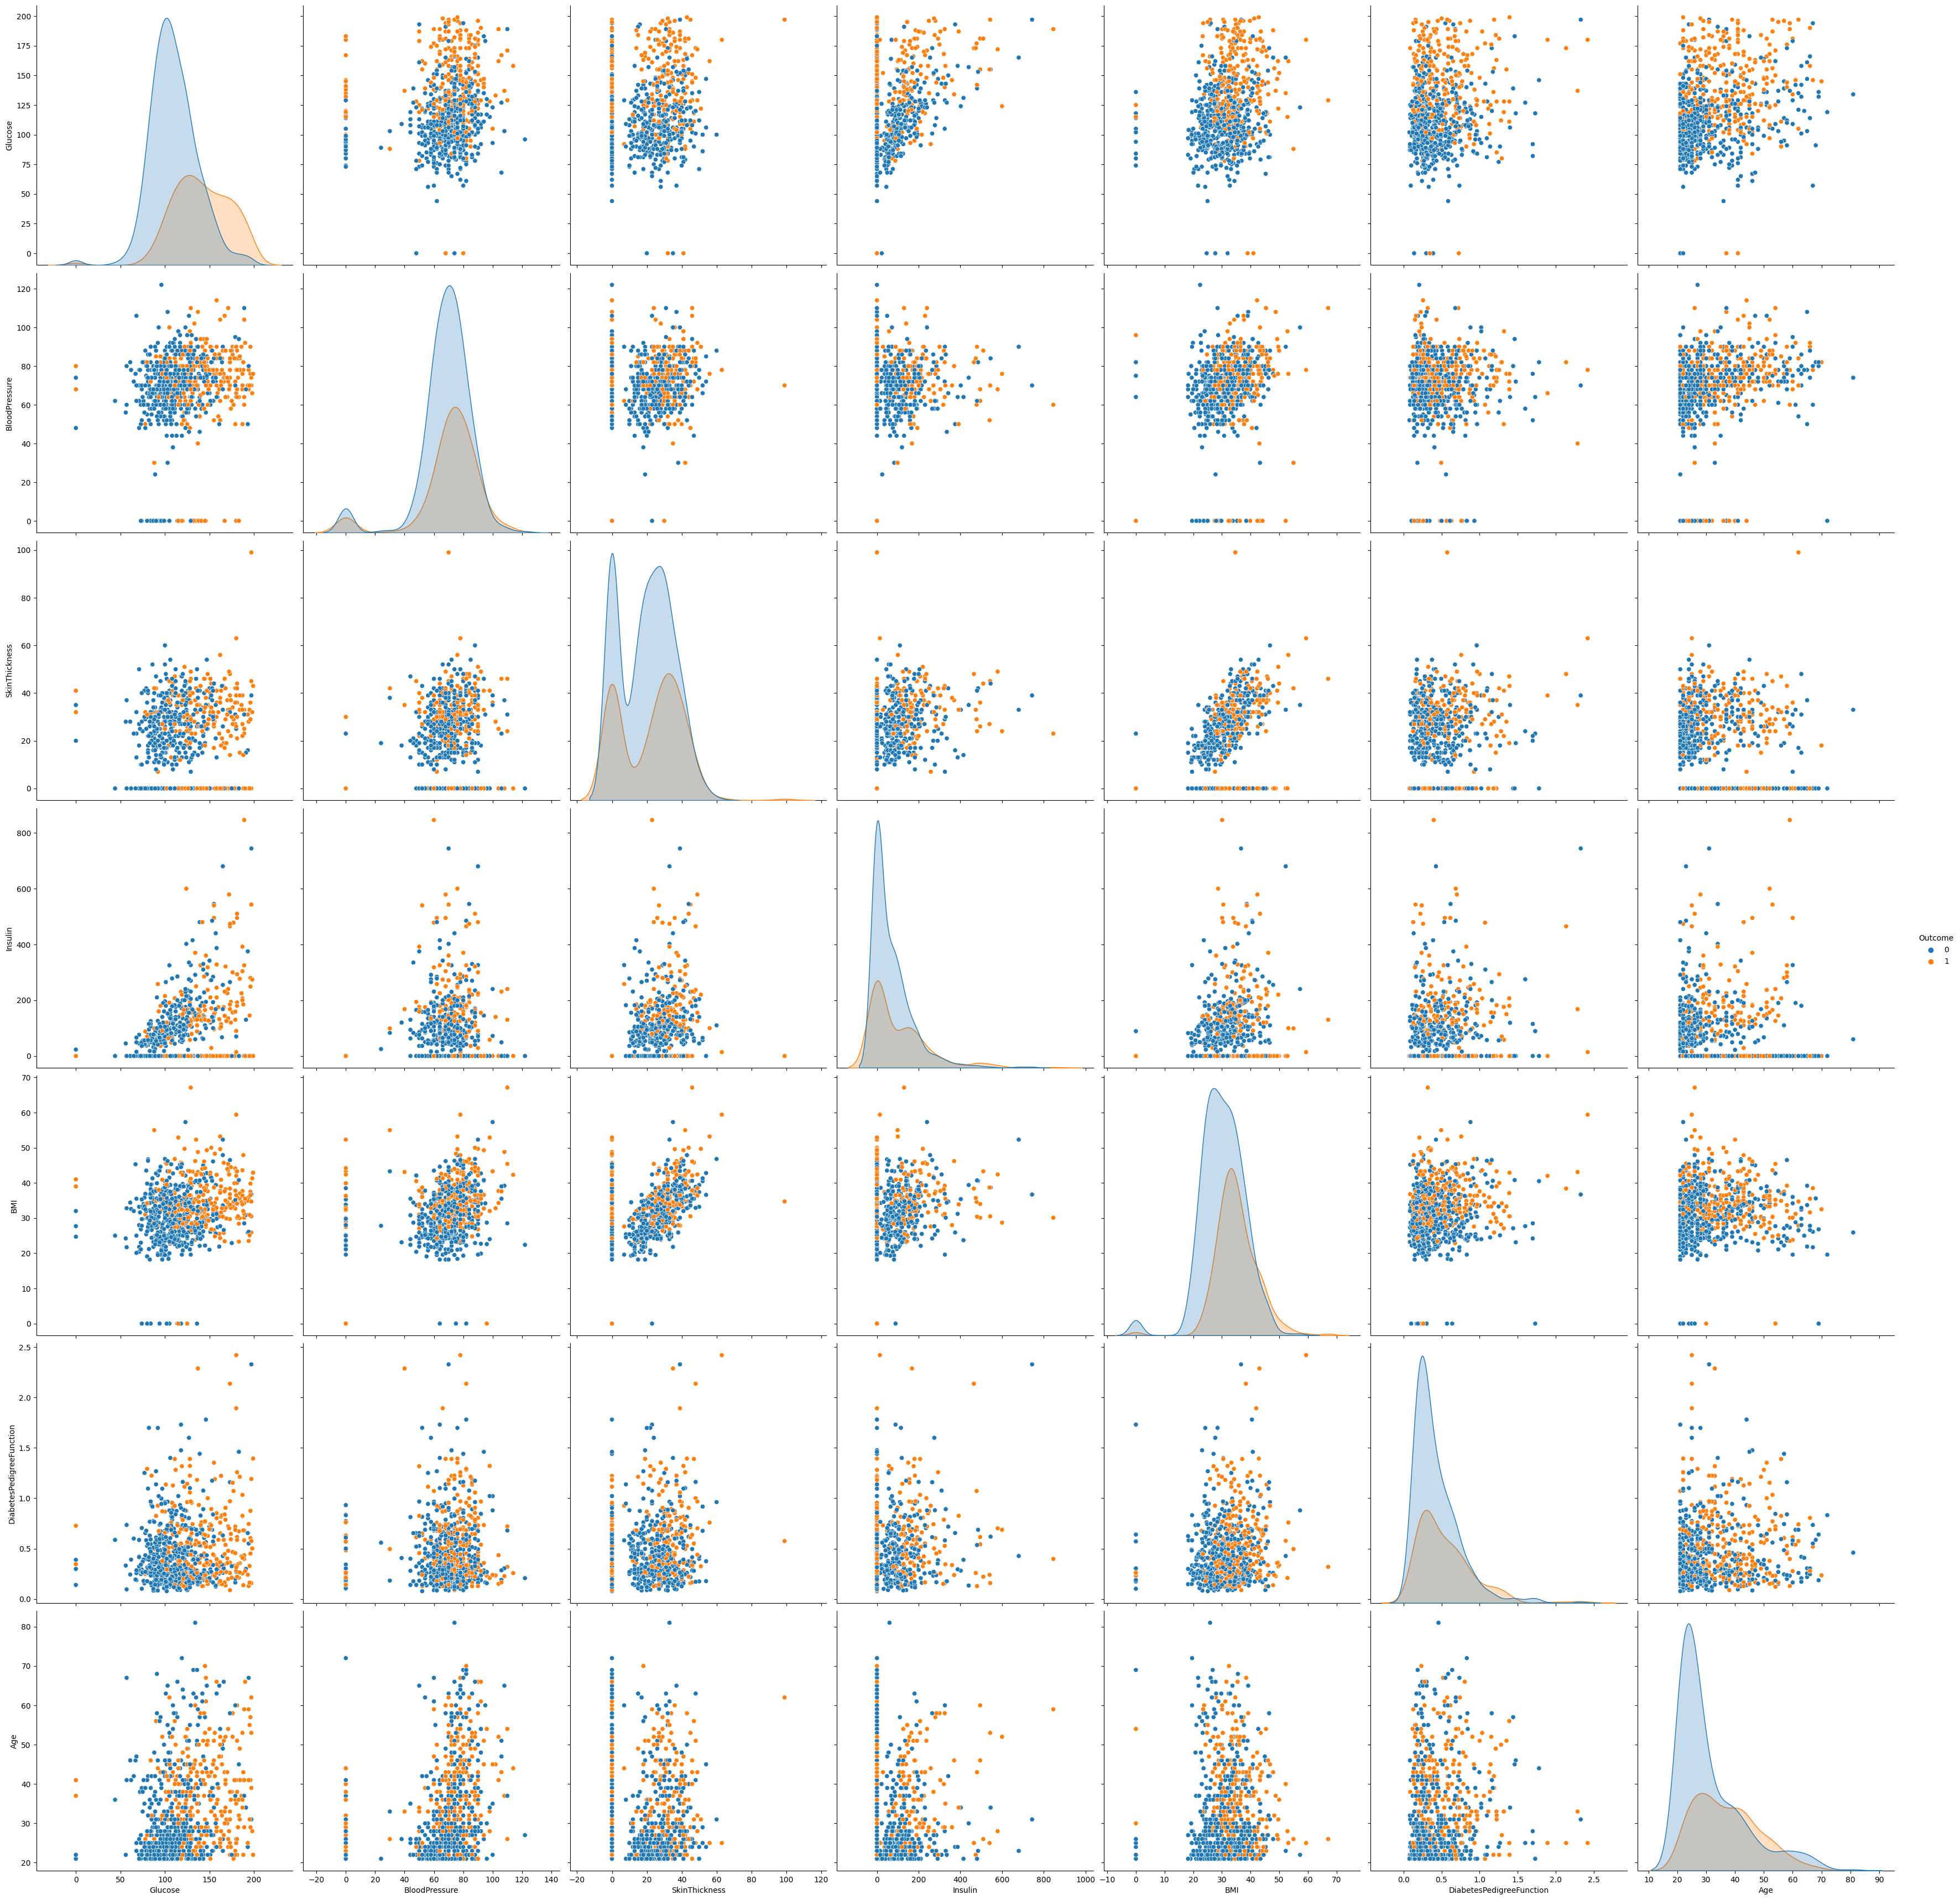

In [26]:
sns.pairplot(data=df, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome', height=5)
plt.show(block=True)

# **12. Examining the Logarithm of the Dependent Variable**

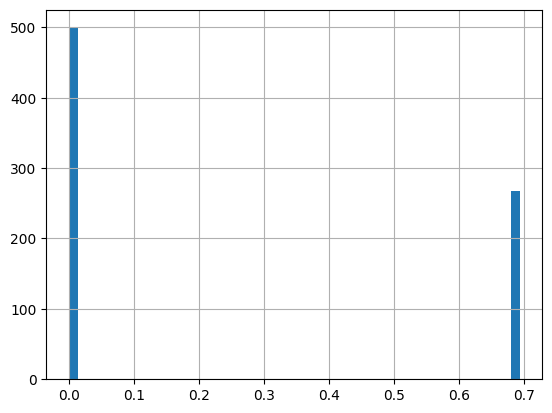

In [27]:
np.log1p(df['Outcome']).hist(bins=50)
plt.show(block=True)

# **13. Feature Engineering**

* **Missing Values Detection**
* **Outlier Detection (Outliers)**
* **Feature Extraction**

# **14. Missing Value Analysis**

In [28]:
# Detection of variables with missing observations filled with zero in the data set.

zero_colunms = [col for col in df.columns if (df[col].min() == 0 and col not in  ["Pregnancies", "Outcome"])]

In [29]:
zero_colunms

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [30]:
# Filling the missing observations in the dataset with NaN that are filled with zero.

for col in zero_colunms:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [31]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [32]:
missing_values_table(df)

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


In [33]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [34]:
num_cols = [col for col in num_cols if col not in "Outcome"]
missing_vs_target(df, "Outcome", num_cols)

                     TARGET_MEAN  Count
Pregnancies_NA_FLAG                    
0                          0.349    768


                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.344    733
1                            0.457     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.333    541
1                            0.388    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.351    757
1                  0.182     11


                                  TARGET_MEAN  Count
DiabetesPedigreeFunction_NA_FLAG                    
0         

In [35]:
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

In [36]:
scaler = RobustScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

In [37]:
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)

In [38]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

In [39]:
df[num_cols] = dff[num_cols]

In [40]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        6.000  148.000         72.000         35.000  400.200 33.600   
1        1.000   85.000         66.000         29.000   65.200 26.600   
2        8.000  183.000         64.000         28.000  194.600 23.300   
3        1.000   89.000         66.000         23.000   94.000 28.100   
4        0.000  137.000         40.000         35.000  168.000 43.100   

   DiabetesPedigreeFunction    Age  Outcome  
0                     0.627 50.000        1  
1                     0.351 31.000        0  
2                     0.672 32.000        1  
3                     0.167 21.000        0  
4                     2.288 33.000        1

In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **15. Outlier Analysis**

In [42]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [43]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [44]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


In [45]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [46]:
for col in df.columns:
    replace_with_thresholds(df, col)

In [47]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


# **16. Base Model**

In [48]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Outcome"]]

In [49]:
# One-Hot-Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [50]:
dff = one_hot_encoder(dff, cat_cols)

In [51]:
dff.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        6.000  148.000         72.000         35.000  400.200 33.600   
1        1.000   85.000         66.000         29.000   65.200 26.600   
2        8.000  183.000         64.000         28.000  194.600 23.300   
3        1.000   89.000         66.000         23.000   94.000 28.100   
4        0.000  137.000         40.000         35.000  168.000 43.100   

   DiabetesPedigreeFunction    Age  Outcome  
0                     0.627 50.000    1.000  
1                     0.351 31.000    0.000  
2                     0.672 32.000    1.000  
3                     0.167 21.000    0.000  
4                     2.288 33.000    1.000

In [52]:
# Standardization

scaler = RobustScaler()

In [53]:
dff[num_cols] = scaler.fit_transform(dff[num_cols])

In [54]:
dff.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        0.600    0.738          0.000          0.500    2.611  0.170   
1       -0.400   -0.762         -0.375          0.000   -0.626 -0.599   
2        1.000    1.571         -0.500         -0.083    0.624 -0.962   
3       -0.400   -0.667         -0.375         -0.500   -0.348 -0.434   
4       -0.600    0.476         -2.000          0.500    0.367  1.214   

   DiabetesPedigreeFunction    Age  Outcome  
0                     0.665  1.235    1.000  
1                    -0.056  0.118    0.000  
2                     0.783  0.176    1.000  
3                    -0.537 -0.471    0.000  
4                     5.008  0.235    1.000

In [55]:
# Creating the Dependent Variable.

y = dff["Outcome"]
# Creating Independent Variables.

X = dff.drop(["Outcome"], axis=1)

In [56]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(verbose=-1, random_state=12345)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))]

base_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    base_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.7696
AUC: 0.8433
Recall: 0.5709
Precision: 0.7125
F1: 0.6334
########## KNN ##########
Accuracy: 0.7761
AUC: 0.8313
Recall: 0.6757
Precision: 0.6797
F1: 0.677
########## CART ##########
Accuracy: 0.7149
AUC: 0.6937
Recall: 0.6234
Precision: 0.585
F1: 0.6031
########## RF ##########
Accuracy: 0.7853
AUC: 0.8534
Recall: 0.642
Precision: 0.7181
F1: 0.6766
########## XGB ##########
Accuracy: 0.7631
AUC: 0.8279
Recall: 0.6423
Precision: 0.6678
F1: 0.6539
########## LightGBM ##########
Accuracy: 0.7761
AUC: 0.8418
Recall: 0.6608
Precision: 0.691
F1: 0.6738
########## CatBoost ##########
Accuracy: 0.8022
AUC: 0.8602
Recall: 0.7017
Precision: 0.7291
F1: 0.7142


# **17. Comparison of Metrics for Different Models Before Feature Engineering**

In [57]:
# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy'],
                 base_models_metrics[6]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC'],
            base_models_metrics[6]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall'],
               base_models_metrics[6]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision'],
                  base_models_metrics[6]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1'],
           base_models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models Before Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

# **18. Feature Importance For Base Model**

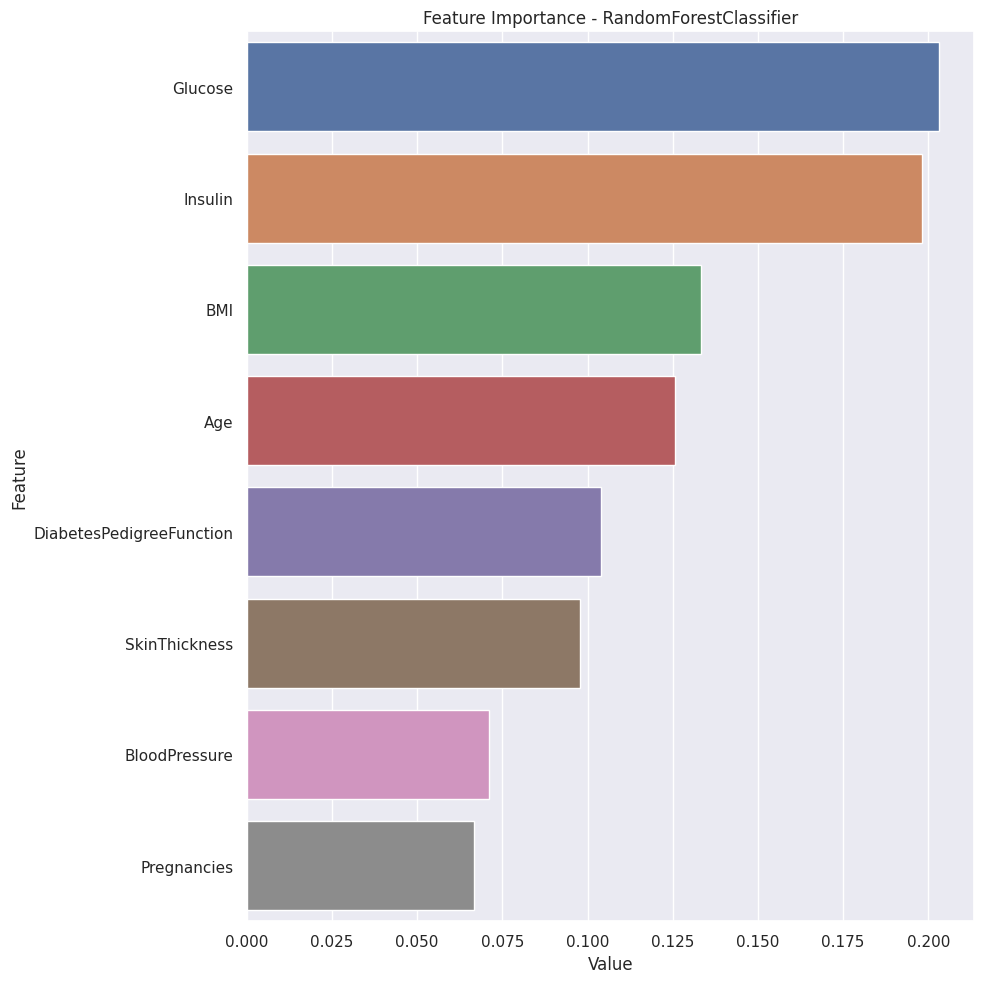

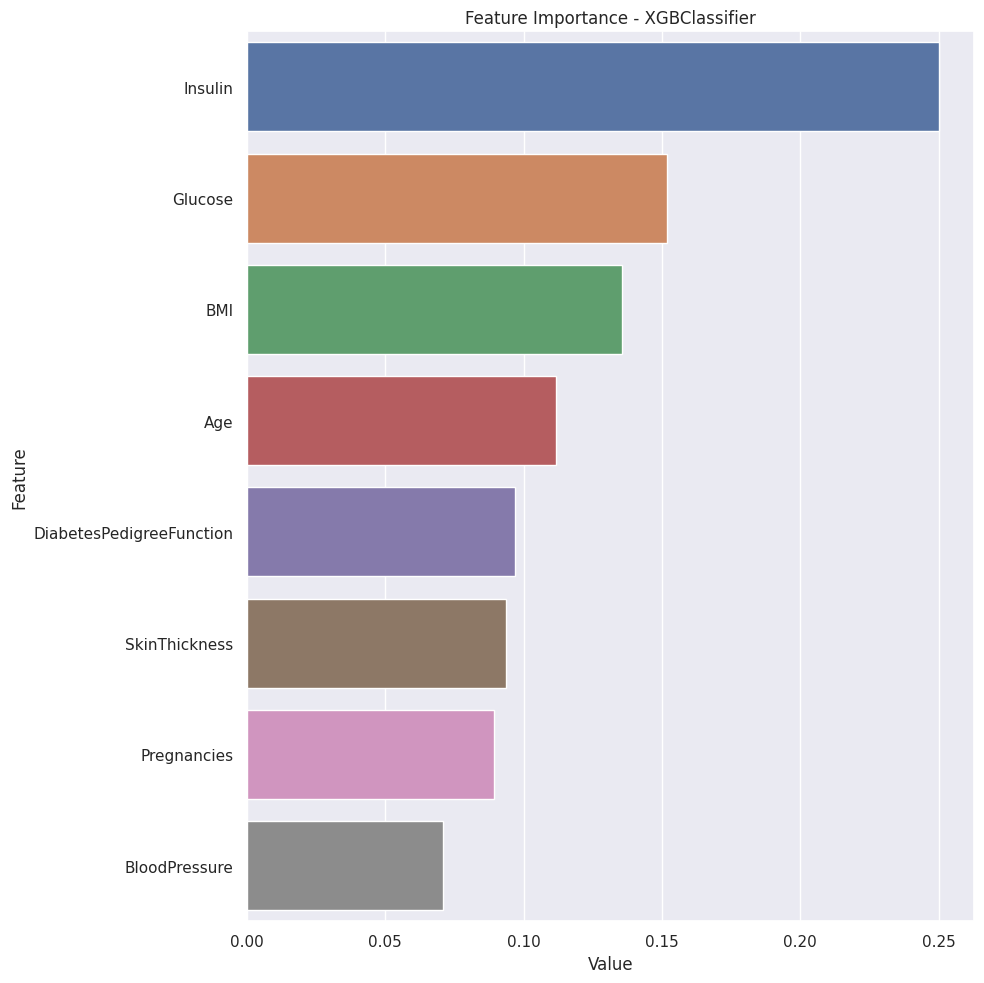

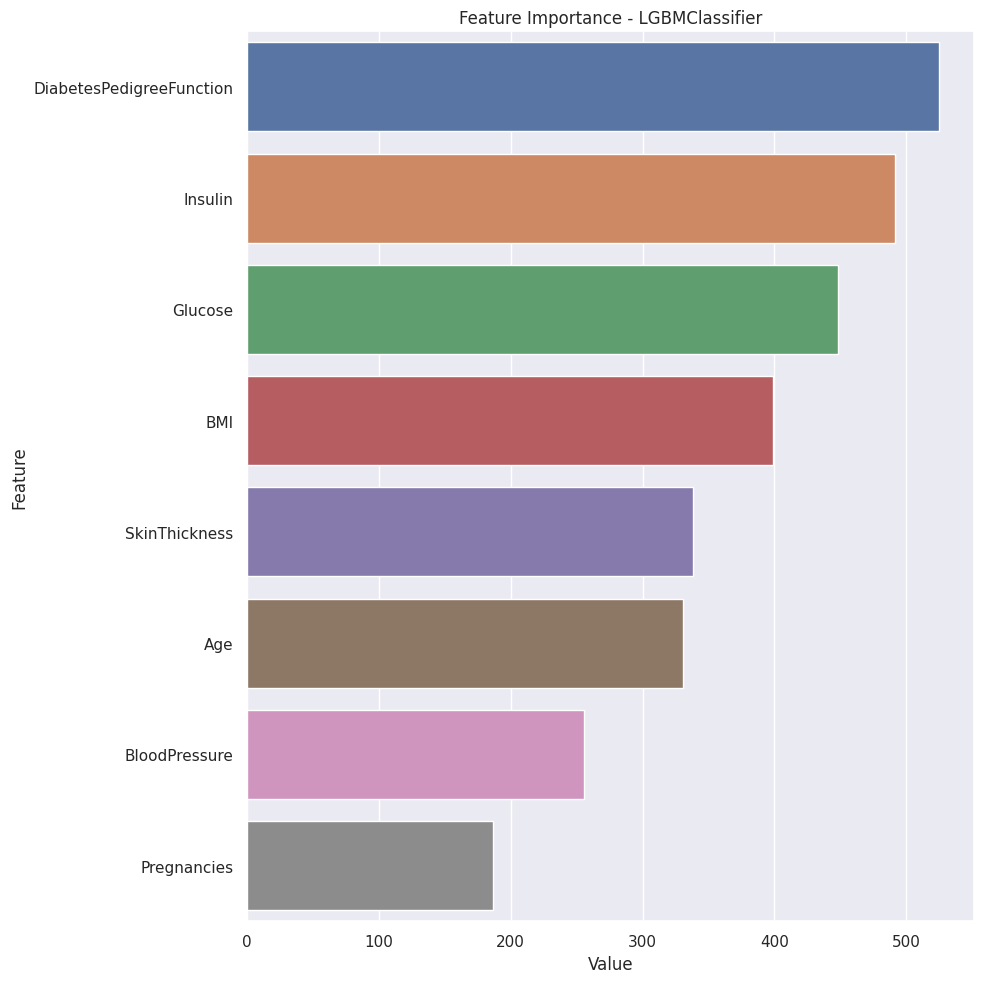

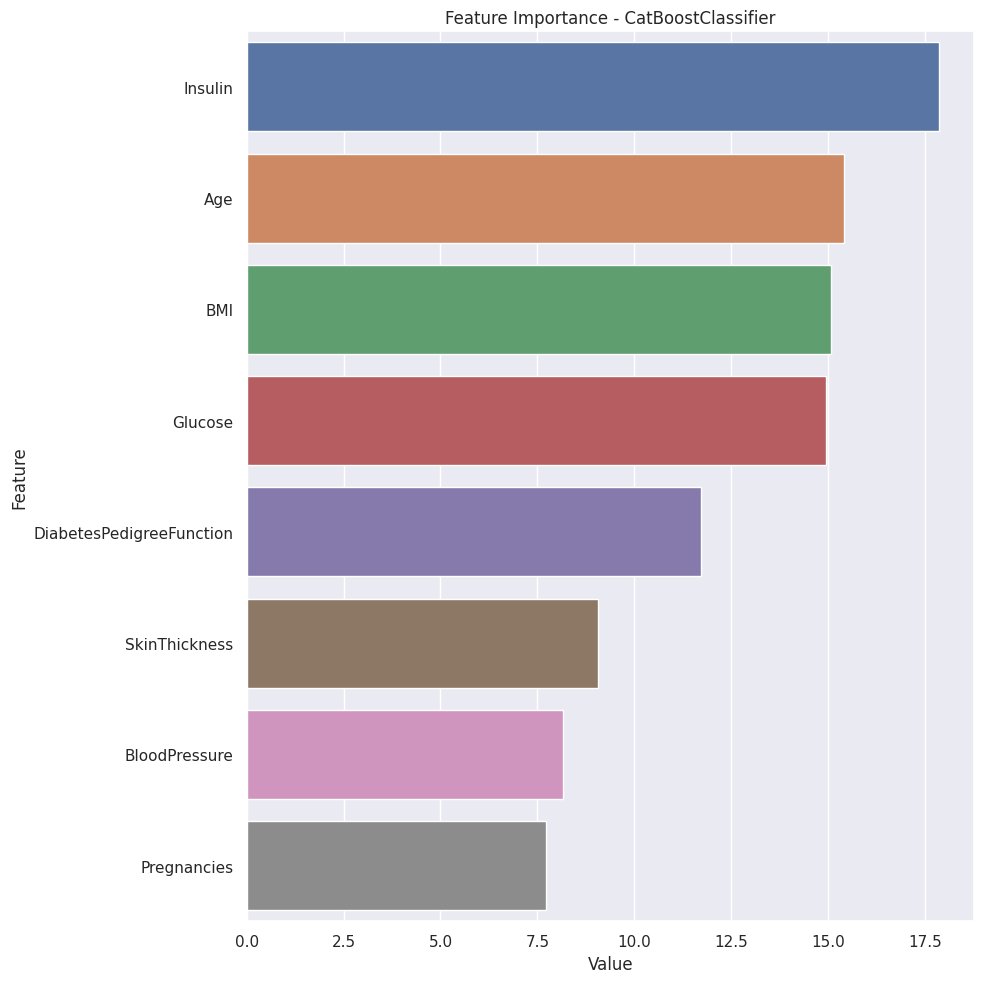

In [58]:
models = [RandomForestClassifier(),
              XGBClassifier(),
              LGBMClassifier(),
              CatBoostClassifier(verbose=False, random_state=12345)
              ]

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

for model in models:
    model.fit(X, y)
    plot_importance(model, X)

# **19. Feature Extraction**

In [59]:
# Creating a new age variable by categorizing the age variable

df['AGE_GROUP'] = pd.cut(df['Age'], bins=[0, 40, 60, 100],
                         labels=["Young_Adults", "Middle-Aged_Adults", "Old_Adults"], right=False)

In [60]:
# BMI below 18.5 is underweight, between 18.5 and 24.9 is normal, between 24.9 and 29.9 is overweight and above 30 is obese

df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100],
                       labels=["Underweight", "Healthy", "Overweight", "Obese_1", "Obese_2", "Obese_3"])

In [61]:
# Creating a categorical variable by considering age and body mass index together 3 breakdowns were captured

df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_BMI_NOM"] = "underweightyoungadult"
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_BMI_NOM"] = "underweightmiddleagedadult"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 60), "NEW_AGE_BMI_NOM"] = "underweightoldagedadult"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_BMI_NOM"] = "healthyyoungadult"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_BMI_NOM"] = "healthymiddleagedadult"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 60), "NEW_AGE_BMI_NOM"] = "healthyoldagedadult"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_BMI_NOM"] = "overweightyoungadult"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_BMI_NOM"] = "overweightmiddleagedadult1"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 60), "NEW_AGE_BMI_NOM"] = "overweightoldagedadult"
df.loc[(df["BMI"] > 30) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_BMI_NOM"] = "obeseyoungadult"
df.loc[(df["BMI"] > 30) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_BMI_NOM"] = "obesemiddleagedadult"
df.loc[(df["BMI"] > 30) & (df["Age"] >= 60), "NEW_AGE_BMI_NOM"] = "obeseoldagedadult"

In [62]:
# Converting Glucose Value to Categorical Variable

df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 59, 79, 100, 126, 300],
                           labels=["Hypoglycemia", "Early_Hypoglycemia", "Normal", "Early_Diabetes", "Diabetes"])

In [63]:
# Creating a categorical variable by considering age and glucose values together

df.loc[(df["Glucose"] < 59) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_GLUCOSE_NOM"] = "Hypoglycemiayoungadult"
df.loc[(df["Glucose"] < 59) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_GLUCOSE_NOM"] = "Hypoglycemiamiddleagedadult"
df.loc[(df["Glucose"] < 59) & (df["Age"] >= 60), "NEW_AGE_GLUCOSE_NOM"] = "Hypoglycemiaoldagedadult"
df.loc[((df["Glucose"] >= 59) & (df["Glucose"] < 79)) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_GLUCOSE_NOM"] = "Early_Hypoglycemiayoungadult"
df.loc[((df["Glucose"] >= 59) & (df["Glucose"] < 79)) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_GLUCOSE_NOM"] = "Early_Hypoglycemiamiddleagedadult"
df.loc[((df["Glucose"] >= 59) & (df["Glucose"] < 79)) & (df["Age"] >= 60), "NEW_AGE_GLUCOSE_NOM"] = "Early_Hypoglycemiaoldagedadult"
df.loc[((df["Glucose"] >= 79) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_GLUCOSE_NOM"] = "Normalyoungadult"
df.loc[((df["Glucose"] >= 79) & (df["Glucose"] < 100)) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_GLUCOSE_NOM"] = "Normalmiddleagedadult"
df.loc[((df["Glucose"] >= 79) & (df["Glucose"] < 100)) & (df["Age"] >= 60), "NEW_AGE_GLUCOSE_NOM"] = "Normaloldagedadult"

df.loc[((df["Glucose"] >= 100) & (df["Glucose"] < 126)) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_GLUCOSE_NOM"] = "Early_Diabetesyoungadult"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] < 126)) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_GLUCOSE_NOM"] = "Early_Diabetesmiddleagedadult"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] < 126)) & (df["Age"] >= 60), "NEW_AGE_GLUCOSE_NOM"] = "Early_Diabetesoldagedadult"

df.loc[(df["Glucose"] > 126) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_GLUCOSE_NOM"] = "Diabetesyoungadult"
df.loc[(df["Glucose"] > 126) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_GLUCOSE_NOM"] = "Diabetesmiddleagedadult"
df.loc[(df["Glucose"] > 126) & (df["Age"] >= 60), "NEW_AGE_GLUCOSE_NOM"] = "Diabetesoldagedadult"

In [64]:
# Converting Insulin Value to Categorical Variable

df["NEW_INSULIN"] = pd.cut(x=df["Insulin"], bins=[0, 40, 60, 120, 250, 1000],
                           labels=["Normal", "Peak_Insulin", "Abnormal_Insulin_Low", "Abnormal_Insulin_Medium", "Abnormal_Insulin_High"])

In [65]:
df.loc[(df["Insulin"] < 40) & ((df["Insulin"] >= 21) & (df["Age"] < 40)), "NEW_AGE_BMI_NOM"] = "Normalyoungadult"
df.loc[(df["Insulin"] < 40) & ((df["Insulin"] >= 40) & (df["Age"] < 60)), "NEW_AGE_BMI_NOM"] = "Normalmiddleagedadult"
df.loc[(df["Insulin"] < 40) & (df["Insulin"] >= 60), "NEW_AGE_BMI_NOM"] = "Normaloldagedadult"
df.loc[((df["Insulin"] >= 40) & (df["Insulin"] < 60)) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_BMI_NOM"] = "Peak_Insulinyoungadult"
df.loc[((df["Insulin"] >= 40) & (df["Insulin"] < 60)) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_BMI_NOM"] = "Peak_Insulinmiddleagedadult"
df.loc[((df["Insulin"] >= 40) & (df["Insulin"] < 60)) & (df["Age"] >= 60), "NEW_AGE_BMI_NOM"] = "Peak_Insulinoldagedadult"
df.loc[((df["Insulin"] >= 60) & (df["Insulin"] < 120)) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_BMI_NOM"] = "Abnormal_Insulin_Lowyoungadult"
df.loc[((df["Insulin"] >= 60) & (df["Insulin"] < 120)) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_BMI_NOM"] = "Abnormal_Insulin_Lowmiddleagedadult"
df.loc[((df["Insulin"] >= 60) & (df["Insulin"] < 120)) & (df["Age"] >= 60), "NEW_AGE_BMI_NOM"] = "Abnormal_Insulin_Lowoldagedadult"
df.loc[((df["Glucose"] >= 120) & (df["Glucose"] < 250)) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_GLUCOSE_NOM"] = "Abnormal_Insulin_Mediumyoungadult"
df.loc[((df["Glucose"] >= 120) & (df["Glucose"] < 250)) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_GLUCOSE_NOM"] = "Abnormal_Insulin_Mediummiddleagedadult"
df.loc[((df["Glucose"] >= 120) & (df["Glucose"] < 250)) & (df["Age"] >= 60), "NEW_AGE_GLUCOSE_NOM"] = "Abnormal_Insulin_Mediumoldagedadult"
df.loc[(df["Insulin"] > 250) & ((df["Age"] >= 21) & (df["Age"] < 40)), "NEW_AGE_BMI_NOM"] = "Abnormal_Insulin_Highyoungadult"
df.loc[(df["Insulin"] > 250) & ((df["Age"] >= 40) & (df["Age"] < 60)), "NEW_AGE_BMI_NOM"] = "Abnormal_Insulin_Highmiddleagedadult"
df.loc[(df["Insulin"] > 250) & (df["Age"] >= 60), "NEW_AGE_BMI_NOM"] = "Abnormal_Insulin_Higholdagedadult"

In [66]:
# Converting BloodPressure Value to Categorical Variable

df["NEW_BLOOD_PRESSURE"] = pd.cut(x=df["BloodPressure"], bins=[0, 80, 89, 120, 300],
                           labels=["Normal", "High_Blood_Pressure_1", "High_Blood_Pressure_2", "Hypertensive_Crisis"])

In [67]:
df["DiabetesPedigreeFunction_Group"] = pd.cut(df["DiabetesPedigreeFunction"], bins=3, labels=["Low", "Medium", "High"])

In [68]:
# Insulin Resistance

df["Insulin_Resistance"] = df["Glucose"] / df["Insulin"]

In [69]:
# Diabetes Family History

df["Diabetes_Risk"] = df["DiabetesPedigreeFunction"] * df["Insulin_Resistance"]

In [70]:
# BMI and Age

df["BMI_Age"] = df["BMI"] * df["Age"]

In [71]:
# Metabolic stress

df["Metabolic_Stress"] = df["BloodPressure"] + df["Glucose"]

In [72]:
# Skin and Insulin

df["Skin_Insulin"] = df["SkinThickness"] * df["Insulin"]

In [73]:
# HbA1c

df["HbA1c"] = (df["Glucose"] + 46.7) / 28.7

In [74]:
# Metabolic Syndrome

skin_thickness_mean = df["SkinThickness"].mean()

conditions = [
    df['BMI'] >= 30,                          # BMI ≥ 30
    df['Glucose'] >= 100,                     # GLUCOSE ≥ 100
    (df['BloodPressure'] >= 85) &
    df['SkinThickness'] > skin_thickness_mean # SKINTHICKNESS > Ortalama
]

total_metabolic_conditions = sum(cond.astype(int) for cond in conditions)

df['METABOLIC_SYNDROME'] = (total_metabolic_conditions >= 3).astype(int)

In [75]:
# Age Group Glucose

age_group_glucose_mean = df.groupby('AGE_GROUP')['Glucose'].transform('mean')
df['GLUCOSE_AGE_GROUP_NORMALIZED'] = df['Glucose'] / age_group_glucose_mean

In [76]:
# Diabetes Risk after Pregnancy

df["Diabetes_Pregnancy"] = df["Pregnancies"] * (df["Age"] - 25)

In [77]:
df.columns = [col.upper() for col in df.columns]

In [78]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
0        6.000  148.000         72.000         35.000  400.200 33.600   
1        1.000   85.000         66.000         29.000   65.200 26.600   
2        8.000  183.000         64.000         28.000  194.600 23.300   
3        1.000   89.000         66.000         23.000   94.000 28.100   
4        0.000  137.000         40.000         35.000  168.000 43.100   

   DIABETESPEDIGREEFUNCTION    AGE  OUTCOME           AGE_GROUP     NEW_BMI  \
0                     0.627 50.000    1.000  Middle-Aged_Adults     Obese_1   
1                     0.351 31.000    0.000        Young_Adults  Overweight   
2                     0.672 32.000    1.000        Young_Adults     Healthy   
3                     0.167 21.000    0.000        Young_Adults  Overweight   
4                     2.288 33.000    1.000        Young_Adults     Obese_3   

                        NEW_AGE_BMI_NOM NEW_GLUCOSE  \
0  Abnormal_Insulin_Highmiddleagedadult    Diabetes   
1        Abnormal_Insulin_Lowyoungadult      Normal   
2                     healthyyoungadult    Diabetes   
3        Abnormal_Insulin_Lowyoungadult      Normal   
4                       obeseyoungadult    Diabetes   

                      NEW_AGE_GLUCOSE_NOM              NEW_INSULIN  \
0  Abnormal_Insulin_Mediummiddleagedadult    Abnormal_Insulin_High   
1                        Normalyoungadult     Abnormal_Insulin_Low   
2       Abnormal_Insulin_Mediumyoungadult  Abnormal_Insulin_Medium   
3                        Normalyoungadult     Abnormal_Insulin_Low   
4       Abnormal_Insulin_Mediumyoungadult  Abnormal_Insulin_Medium   

  NEW_BLOOD_PRESSURE DIABETESPEDIGREEFUNCTION_GROUP  INSULIN_RESISTANCE  \
0             Normal                            Low               0.370   
1             Normal                            Low               1.304   
2             Normal                            Low               0.940   
3             Normal                            Low               0.947   
4             Normal                           High               0.815   

   DIABETES_RISK  BMI_AGE  METABOLIC_STRESS  SKIN_INSULIN  HBA1C  \
0          0.232 1680.000           220.000     14007.000  6.784   
1          0.458  824.600           151.000      1890.800  4.589   
2          0.632  745.600           247.000      5448.800  8.003   
3          0.158  590.100           155.000      2162.000  4.728   
4          1.866 1422.300           177.000      5880.000  6.401   

   METABOLIC_SYNDROME  GLUCOSE_AGE_GROUP_NORMALIZED  DIABETES_PREGNANCY  
0                   0                         1.134             150.000  
1                   0                         0.721               6.000  
2                   0                         1.552              56.000  
3                   0                         0.755              -4.000  
4                   0                         1.162               0.000

# **20. ENCODING**

In [79]:
# Analysis of Variables.

def grab_col_names(dataframe, cat_th=10, car_th=23):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}") # number of observations in the data frame.
    print(f"Variables: {dataframe.shape[1]}") # number of variables in the data frame..
    print(f'cat_cols: {len(cat_cols)}') # categorical columns.
    print(f'num_cols: {len(num_cols)}') # numerical columns.
    print(f'cat_but_car: {len(cat_but_car)}') # cardinal columns.
    print(f'num_but_cat: {len(num_but_cat)}') # numeric but categorical


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [80]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 768
Variables: 26
cat_cols: 10
num_cols: 16
cat_but_car: 0
num_but_cat: 8


In [81]:
cat_cols

['NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'OUTCOME',
 'AGE_GROUP',
 'NEW_BMI',
 'NEW_GLUCOSE',
 'NEW_INSULIN',
 'NEW_BLOOD_PRESSURE',
 'DIABETESPEDIGREEFUNCTION_GROUP',
 'METABOLIC_SYNDROME']

In [82]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'INSULIN_RESISTANCE',
 'DIABETES_RISK',
 'BMI_AGE',
 'METABOLIC_STRESS',
 'SKIN_INSULIN',
 'HBA1C',
 'GLUCOSE_AGE_GROUP_NORMALIZED',
 'DIABETES_PREGNANCY']

In [83]:
cat_but_car

[]

In [84]:
num_but_cat

['OUTCOME',
 'AGE_GROUP',
 'NEW_BMI',
 'NEW_GLUCOSE',
 'NEW_INSULIN',
 'NEW_BLOOD_PRESSURE',
 'DIABETESPEDIGREEFUNCTION_GROUP',
 'METABOLIC_SYNDROME']

In [85]:
# Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [86]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [87]:
binary_cols

[]

In [88]:
# One-Hot Encoding

cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]

In [89]:
cat_cols

['NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'AGE_GROUP',
 'NEW_BMI',
 'NEW_GLUCOSE',
 'NEW_INSULIN',
 'NEW_BLOOD_PRESSURE',
 'DIABETESPEDIGREEFUNCTION_GROUP',
 'METABOLIC_SYNDROME']

In [90]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [91]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [92]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
0        6.000  148.000         72.000         35.000  400.200 33.600   
1        1.000   85.000         66.000         29.000   65.200 26.600   
2        8.000  183.000         64.000         28.000  194.600 23.300   
3        1.000   89.000         66.000         23.000   94.000 28.100   
4        0.000  137.000         40.000         35.000  168.000 43.100   

   DIABETESPEDIGREEFUNCTION    AGE  OUTCOME  INSULIN_RESISTANCE  \
0                     0.627 50.000    1.000               0.370   
1                     0.351 31.000    0.000               1.304   
2                     0.672 32.000    1.000               0.940   
3                     0.167 21.000    0.000               0.947   
4                     2.288 33.000    1.000               0.815   

   DIABETES_RISK  BMI_AGE  METABOLIC_STRESS  SKIN_INSULIN  HBA1C  \
0          0.232 1680.000           220.000     14007.000  6.784   
1          0.458  824.600           151.000      1890.800  4.589   
2          0.632  745.600           247.000      5448.800  8.003   
3          0.158  590.100           155.000      2162.000  4.728   
4          1.866 1422.300           177.000      5880.000  6.401   

   GLUCOSE_AGE_GROUP_NORMALIZED  DIABETES_PREGNANCY  \
0                         1.134             150.000   
1                         0.721               6.000   
2                         1.552              56.000   
3                         0.755              -4.000   
4                         1.162               0.000   

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Higholdagedadult  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Highyoungadult  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Lowmiddleagedadult  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Lowoldagedadult  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Lowyoungadult  \
0                                           False   
1                                            True   
2                                           False   
3                                            True   
4                                           False   

   NEW_AGE_BMI_NOM_Normalyoungadult  \
0                             False   
1                             False   
2                             False   
3                             False   
4                             False   

   NEW_AGE_BMI_NOM_Peak_Insulinmiddleagedadult  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   NEW_AGE_BMI_NOM_Peak_Insulinyoungadult  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   

# **21. Standardization Process**

In [93]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'INSULIN_RESISTANCE',
 'DIABETES_RISK',
 'BMI_AGE',
 'METABOLIC_STRESS',
 'SKIN_INSULIN',
 'HBA1C',
 'GLUCOSE_AGE_GROUP_NORMALIZED',
 'DIABETES_PREGNANCY']

In [94]:
scaler = RobustScaler()

In [95]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [96]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
0        0.600    0.738          0.000          0.500    2.611  0.170   
1       -0.400   -0.762         -0.375          0.000   -0.626 -0.599   
2        1.000    1.571         -0.500         -0.083    0.624 -0.962   
3       -0.400   -0.667         -0.375         -0.500   -0.348 -0.434   
4       -0.600    0.476         -2.000          0.500    0.367  1.214   

   DIABETESPEDIGREEFUNCTION    AGE  OUTCOME  INSULIN_RESISTANCE  \
0                     0.665  1.235    1.000              -1.099   
1                    -0.056  0.118    0.000               0.782   
2                     0.783  0.176    1.000               0.050   
3                    -0.537 -0.471    0.000               0.063   
4                     5.008  0.235    1.000              -0.202   

   DIABETES_RISK  BMI_AGE  METABOLIC_STRESS  SKIN_INSULIN  HBA1C  \
0         -0.302    1.128             0.585         2.661  0.738   
1          0.309   -0.265            -0.761        -0.496 -0.762   
2          0.781   -0.394             1.112         0.431  1.571   
3         -0.502   -0.647            -0.683        -0.425 -0.667   
4          4.121    0.709            -0.254         0.544  0.476   

   GLUCOSE_AGE_GROUP_NORMALIZED  DIABETES_PREGNANCY  \
0                         0.525               1.690   
1                        -0.763              -0.024   
2                         1.827               0.571   
3                        -0.657              -0.143   
4                         0.611              -0.095   

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Higholdagedadult  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Highyoungadult  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Lowmiddleagedadult  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Lowoldagedadult  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   NEW_AGE_BMI_NOM_Abnormal_Insulin_Lowyoungadult  \
0                                           False   
1                                            True   
2                                           False   
3                                            True   
4                                           False   

   NEW_AGE_BMI_NOM_Normalyoungadult  \
0                             False   
1                             False   
2                             False   
3                             False   
4                             False   

   NEW_AGE_BMI_NOM_Peak_Insulinmiddleagedadult  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   NEW_AGE_BMI_NOM_Peak_Insulinyoungadult  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   

# **22. Creating Model**

In [97]:
# Creating the Dependent Variable.

y = df["OUTCOME"]

# Creating Independent Variables.

X = df.drop("OUTCOME", axis=1)

In [98]:
# Cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=12345)

# Model list
models = [
    ('LR', LogisticRegression(random_state=12345)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=12345)),
    ('RF', RandomForestClassifier(random_state=12345)),
    ('XGB', XGBClassifier(random_state=12345)),
    # ("LightGBM", LGBMClassifier(verbose=-1, random_state=12345)),
    ("CatBoost", CatBoostClassifier(verbose=False, random_state=12345))
]

# First model metrics
last_models_metrics = []

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=cv, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    last_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")

########## LR ##########
Accuracy: 0.8
AUC: 0.867
Recall: 0.6592
Precision: 0.7227
F1: 0.6877
########## KNN ##########
Accuracy: 0.7779
AUC: 0.8224
Recall: 0.6549
Precision: 0.676
F1: 0.6617
########## CART ##########
Accuracy: 0.7351
AUC: 0.702
Recall: 0.6034
Precision: 0.6045
F1: 0.6026
########## RF ##########
Accuracy: 0.7987
AUC: 0.8592
Recall: 0.6449
Precision: 0.7267
F1: 0.6812
########## XGB ##########
Accuracy: 0.8039
AUC: 0.8425
Recall: 0.6916
Precision: 0.7145
F1: 0.7016
########## CatBoost ##########
Accuracy: 0.8078
AUC: 0.8719
Recall: 0.6769
Precision: 0.7341
F1: 0.7013


# **23. Comparison of Metrics for Different Models After Feature Engineering**

In [99]:
# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

# **23. Feature Importance**

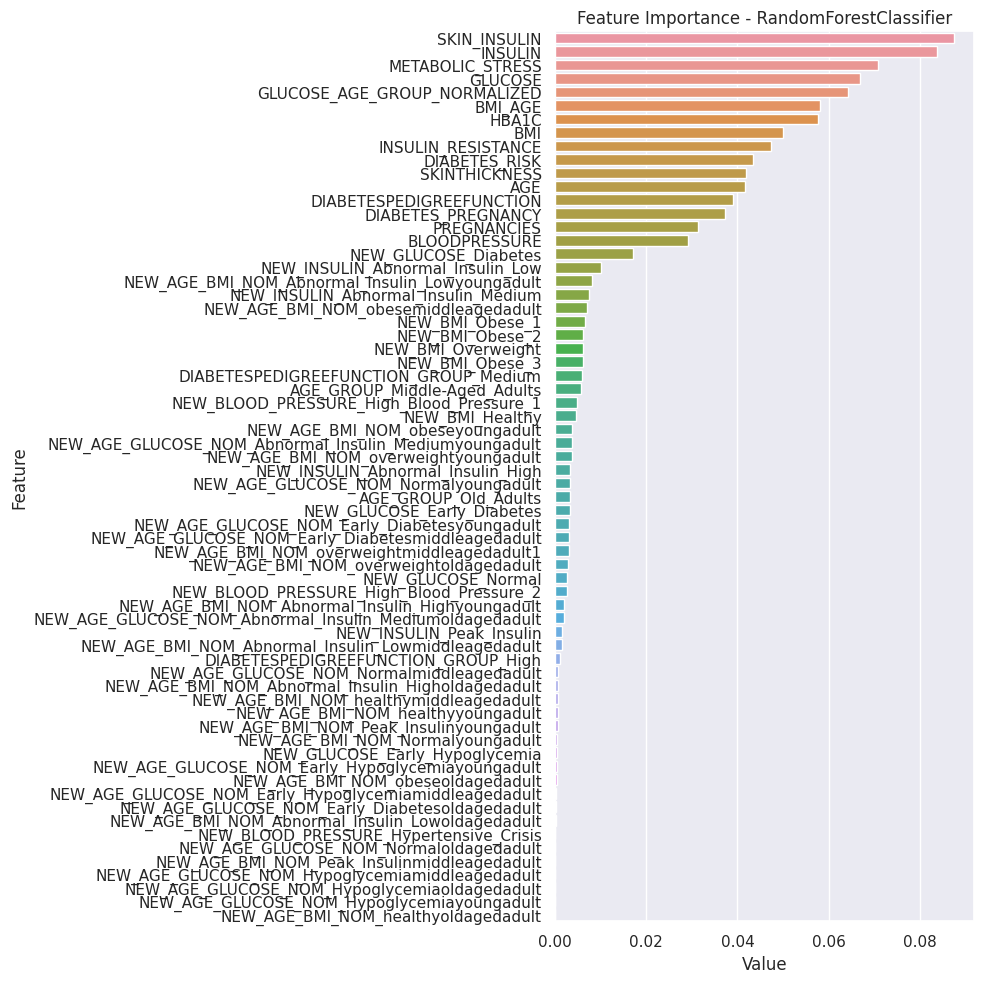

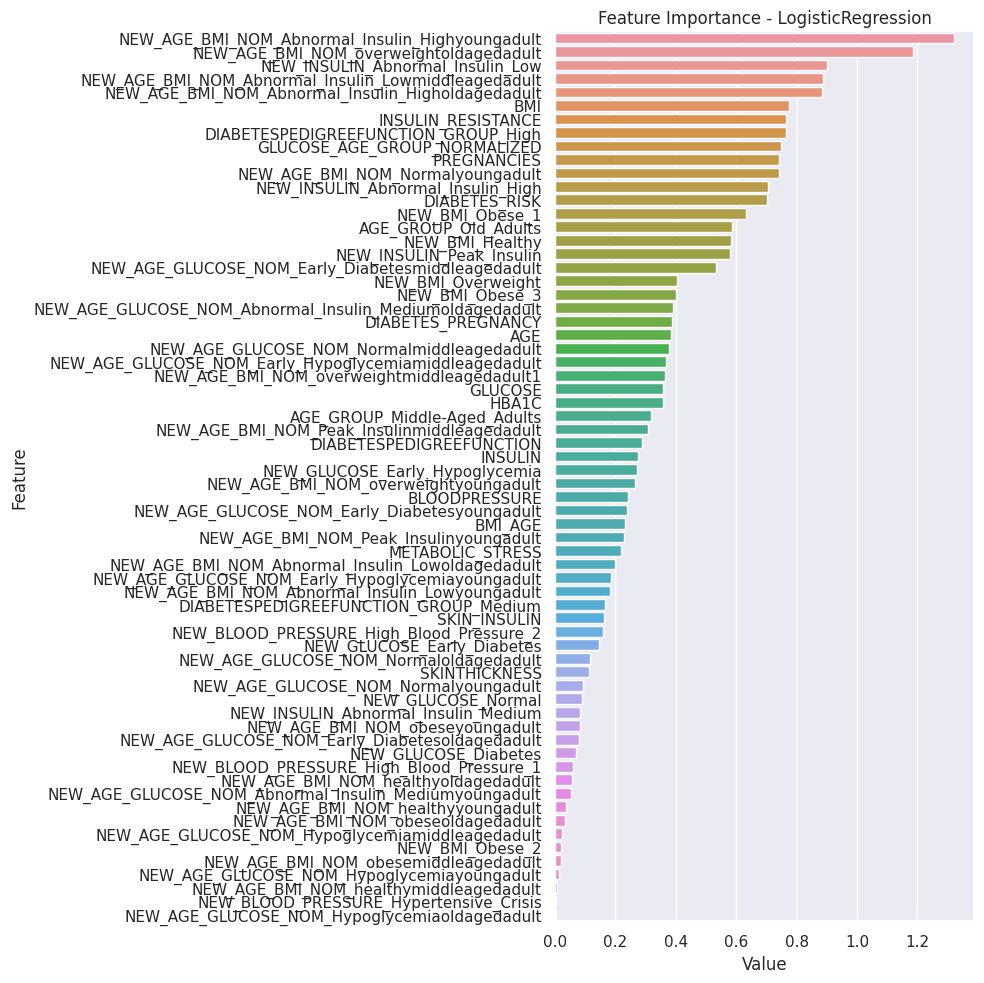

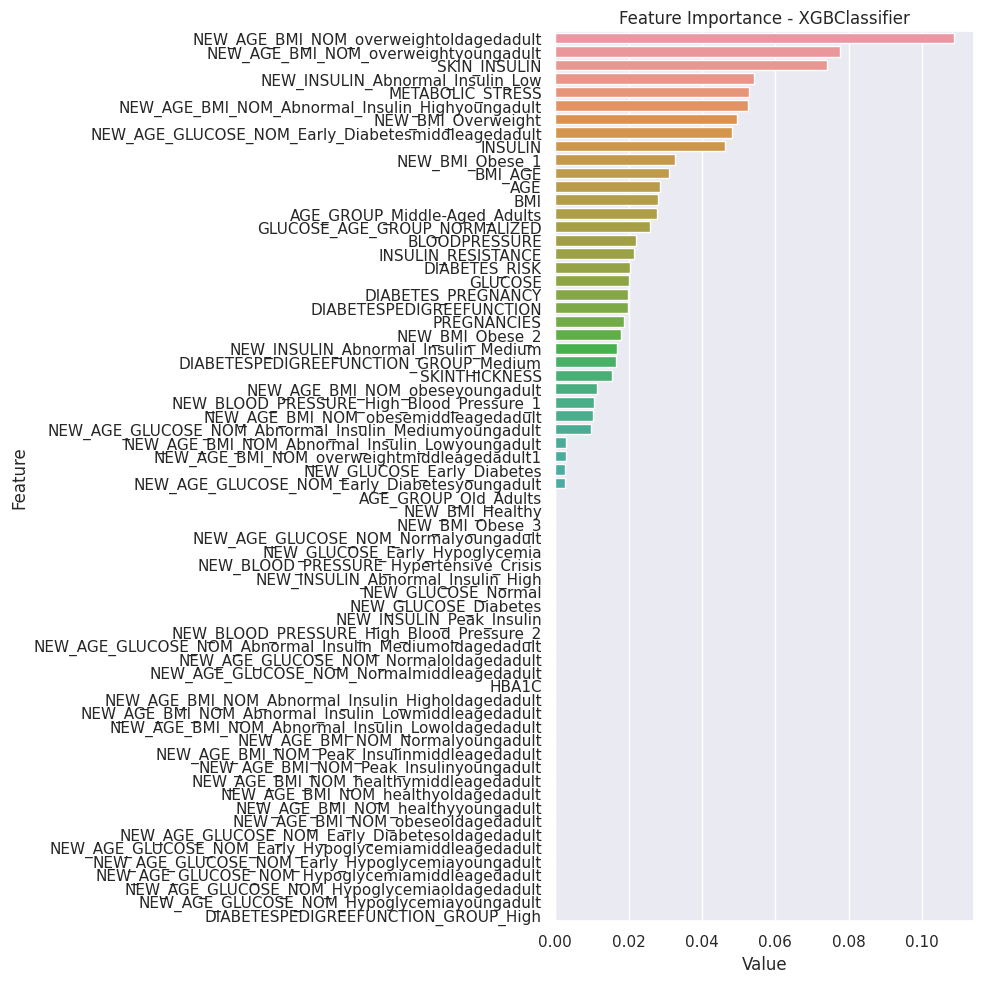

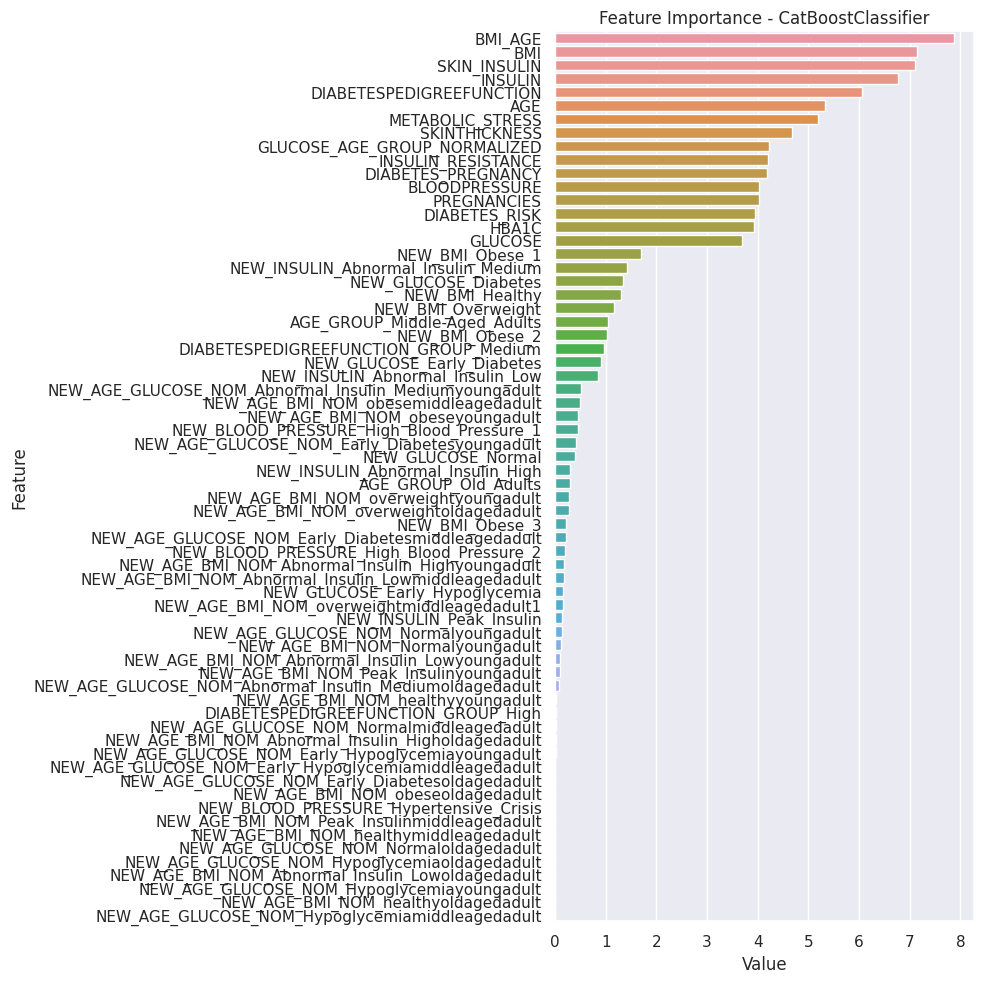

In [100]:
def plot_importance(model, features, num=None, save=False):
    # Plotlanacak özellik sayısını varsayılan olarak sütun sayısı olarak ayarla
    if num is None:
        num = len(features.columns)

    # Modelin feature importance özelliğini kontrol et
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # LogisticRegression gibi modeller için
        importances = model.coef_[0] if model.coef_.ndim == 2 else model.coef_
        importances = np.abs(importances)
    else:
        print(f"{model.__class__.__name__} modelinde özellik önem değerleri bulunamadı.")
        return

    feature_imp = pd.DataFrame({'Value': importances, 'Feature': features.columns})

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature",
                data=feature_imp.sort_values(by="Value", ascending=False).iloc[:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')
    plt.show()

# Örnek kullanım:
models = [RandomForestClassifier(),
          LogisticRegression(),
          XGBClassifier(),
          # LGBMClassifier(),
          CatBoostClassifier(verbose=False, random_state=12345)
         ]

for model in models:
    model.fit(X, y)
    plot_importance(model, X)

# **25. Metric Improvement Comparison After Feature Engineering**

In [101]:
# Dictionary containing the updated metric results
base_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "CatBoost"],
    "Accuracy": [base_models_metrics[0]['Accuracy'], base_models_metrics[1]['Accuracy'],
                 base_models_metrics[2]['Accuracy'], base_models_metrics[3]['Accuracy'],
                 base_models_metrics[4]['Accuracy'], base_models_metrics[5]['Accuracy']],
    "AUC": [base_models_metrics[0]['AUC'], base_models_metrics[1]['AUC'],
            base_models_metrics[2]['AUC'], base_models_metrics[3]['AUC'],
            base_models_metrics[4]['AUC'], base_models_metrics[5]['AUC']],
    "Recall": [base_models_metrics[0]['Recall'], base_models_metrics[1]['Recall'],
               base_models_metrics[2]['Recall'], base_models_metrics[3]['Recall'],
               base_models_metrics[4]['Recall'], base_models_metrics[5]['Recall']],
    "Precision": [base_models_metrics[0]['Precision'], base_models_metrics[1]['Precision'],
                  base_models_metrics[2]['Precision'], base_models_metrics[3]['Precision'],
                  base_models_metrics[4]['Precision'], base_models_metrics[5]['Precision']],
    "F1": [base_models_metrics[0]['F1'], base_models_metrics[1]['F1'],
           base_models_metrics[2]['F1'], base_models_metrics[3]['F1'],
           base_models_metrics[4]['F1'], base_models_metrics[5]['F1']]
}

last_metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "CatBoost"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy'], last_models_metrics[5]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC'], last_models_metrics[5]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall'], last_models_metrics[5]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision'], last_models_metrics[5]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1'], last_models_metrics[5]['F1']]
}

# Creating DataFrames from the metric dictionaries
base_results_df = pd.DataFrame(base_metrics)
last_results_df = pd.DataFrame(last_metrics)

# Calculating the improvement percentages for each metric
improvement_df = pd.DataFrame()
improvement_df["Model"] = base_results_df["Model"]
improvement_df["Accuracy"] = ((last_results_df["Accuracy"] - base_results_df["Accuracy"]) / base_results_df["Accuracy"]) * 100
improvement_df["AUC"] = ((last_results_df["AUC"] - base_results_df["AUC"]) / base_results_df["AUC"]) * 100
improvement_df["Recall"] = ((last_results_df["Recall"] - base_results_df["Recall"]) / base_results_df["Recall"]) * 100
improvement_df["Precision"] = ((last_results_df["Precision"] - base_results_df["Precision"]) / base_results_df["Precision"]) * 100
improvement_df["F1"] = ((last_results_df["F1"] - base_results_df["F1"]) / base_results_df["F1"]) * 100

# Sorting the DataFrame by accuracy improvement in descending order
improvement_df = improvement_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=improvement_df["Model"],
        y=improvement_df[metric],
        marker_color=color,
        name=metric,
        text=improvement_df[metric].apply(lambda x: f"{round(x, 2)}%"),
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Improvement Percentage",
    title="Metric Improvement Comparison After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

# **26. Hyperparameter Optimization**

In [102]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=12345
)

# Hyperparameter grids
param_grids = {
    "LR": {"C": [0.001, 0.01, 0.1, 1, 10, 100]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']},
    "CART": {"max_depth": [3, 5, 7, None], "min_samples_split": [2, 5, 10]},
    "RF": {"n_estimators": [100, 200], "max_depth": [5, 7, None], "min_samples_leaf": [1, 2]},
    "XGB": {"learning_rate": [0.01, 0.1], "max_depth": [3, 5], "subsample": [0.8, 1.0]},
    "LightGBM": {"num_leaves": [31, 63], "learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},
    "CatBoost": {"iterations": [500], "depth": [4, 6], "learning_rate": [0.03, 0.1]}
}

# Optimization
def optimize_and_evaluate(models, param_grids):
    optimized_results = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
    
    for model_info in models:
        name = model_info[0]
        model = model_info[1]
        
        print(f"\n⏳ {name} Optimization...")
        
        try:
            if name not in param_grids:
                raise ValueError(f"{name} no parametre grid")
                
            gs = GridSearchCV(
                estimator=model,
                param_grid=param_grids[name],
                cv=skf,
                scoring='accuracy',
                n_jobs=-1,
                verbose=0
            ).fit(X_train, y_train)
            
            final_model = gs.best_estimator_
            y_pred = final_model.predict(X_test)
            y_proba = final_model.predict_proba(X_test)[:,1] if hasattr(final_model, "predict_proba") else None
            
            metrics = {
                "Model": name,
                "Best Params": gs.best_params_,
                "Test Accuracy": round(accuracy_score(y_test, y_pred), 4),
                "Test AUC": round(roc_auc_score(y_test, y_proba), 4) if y_proba is not None else "N/A",
                "Test F1": round(f1_score(y_test, y_pred), 4),
                "Test Precision": round(precision_score(y_test, y_pred), 4),
                "Test Recall": round(recall_score(y_test, y_pred), 4)
            }
            
            optimized_results.append(metrics)
            print(f"✅ {name} completed | Best accuracy: {metrics['Test Accuracy']}")
            
        except Exception as e:
            print(f"❌ {name} hatası: {str(e)}")
            continue
    
    return pd.DataFrame(optimized_results)

param_grids = {
    "LR": {"C": [0.001, 0.01, 0.1, 1, 10, 100]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance']},
    "CART": {"max_depth": [3, 5, 7, None], "min_samples_split": [2, 5, 10]},
    "RF": {"n_estimators": [100, 200], "max_depth": [5, 7, None], "min_samples_leaf": [1, 2]},
    "XGB": {"learning_rate": [0.01, 0.1], "max_depth": [3, 5], "subsample": [0.8, 1.0]},
    # "LightGBM": {"num_leaves": [31, 63], "learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},
    "CatBoost": {"iterations": [500], "depth": [4, 6], "learning_rate": [0.03, 0.1]}
}

# Model list (original)
models_to_optimize = [
    ("LR", LogisticRegression(random_state=12345, max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("CART", DecisionTreeClassifier(random_state=12345)),
    ("RF", RandomForestClassifier(random_state=12345, n_jobs=-1)),
    ("XGB", XGBClassifier(random_state=12345, n_jobs=-1)),
    # ("LightGBM", LGBMClassifier(random_state=12345, verbose=-1, n_jobs=-1)), 
    ("CatBoost", CatBoostClassifier(random_state=12345, verbose=False))
]

optimized_df = optimize_and_evaluate(
    models=models_to_optimize,
    param_grids=param_grids
)


⏳ LR Optimization...
✅ LR completed | Best accuracy: 0.8117

⏳ KNN Optimization...
✅ KNN completed | Best accuracy: 0.7662

⏳ CART Optimization...
✅ CART completed | Best accuracy: 0.7468

⏳ RF Optimization...
✅ RF completed | Best accuracy: 0.7922

⏳ XGB Optimization...
✅ XGB completed | Best accuracy: 0.7987

⏳ CatBoost Optimization...
✅ CatBoost completed | Best accuracy: 0.8117


# **27. Final Model**

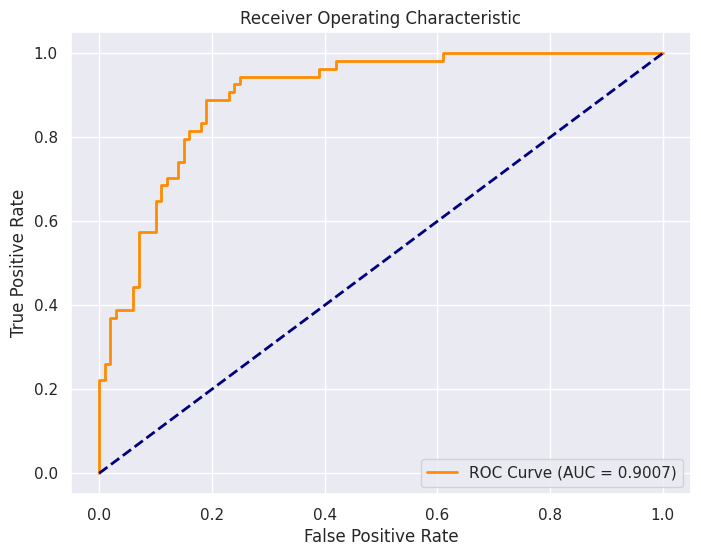

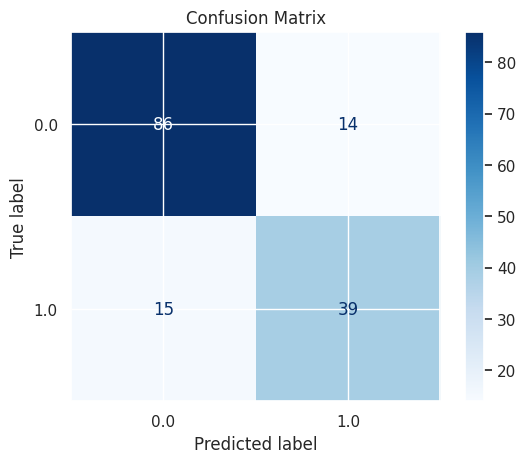

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.8117
Recall   : 0.7222
Precision: 0.7358
F1 Score : 0.7290
AUC      : 0.9007


In [103]:
# Identify the best model based on Test Accuracy
best_row = optimized_df.loc[optimized_df['Test Accuracy'].idxmax()]
model_name = best_row['Model']
best_params = best_row['Best Params']

# Find the corresponding base model from models_to_optimize
base_model = None
for name, model in models_to_optimize:
    if name == model_name:
        base_model = model
        break
if base_model is None:
    raise ValueError(f"Model {model_name} not found in models_to_optimize")

# Clone the base model and set the best parameters
from sklearn.base import clone
best_model = clone(base_model)
best_model.set_params(**best_params)

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Test set predictions
y_final_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Positive class probabilities

# ROC Curve calculations
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Performance metrics
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")